## Лабораторная работа 0 

### Непрерывная случайная величина

In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable as pt
from scipy import stats as st
import math
my_size = 1000
my_lambda =9 / 5

Сгенерируем набор случайных величин c равномерным распределением

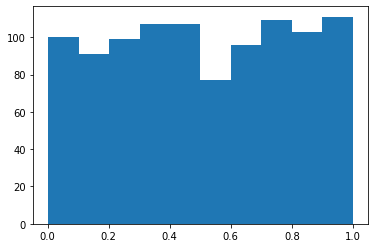

In [73]:
linear = np.random.uniform(size=my_size)
plt.hist(linear)
plt.show()

Согласно номеру варианта (13), примем $\lambda = \frac{9}{5}$

$x_i=-\frac{1}{\lambda}\ln(y_i)$, где $x_i$ - псевдослучайное число показательного распределения, а $y_i$ - псевдослучайное число равномерного распределения

Получим по данной формуле значения, соответствующие показательному распределению:

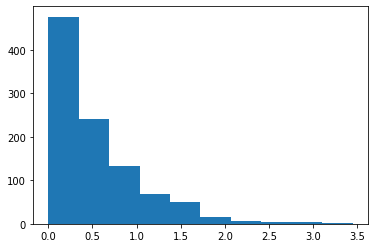

In [74]:
exponential = np.multiply(np.log(linear), -1/my_lambda)
plt.hist(exponential)
plt.show()

Вычислим среднее арифметическое и выборочную дисперсию для полученной выборки.
$MX = \frac{1}{\lambda} , DX = \frac{1}{\lambda ^2}  $

In [75]:
#mean = np.mean(exponential)
#mean2 = np.mean(np.square(exponential))
#dispertion = mean2 - mean**2
mean=1/my_lambda
dispertion= mean/my_lambda
print("Среднее {}, дисперсия {}".format(mean, dispertion))

Среднее 0.5555555555555556, дисперсия 0.30864197530864196


Проверим гипотезу о том, что полученная выборка соответствует показательному закону распределения. Используем критерий Пирсона (${\chi}^2$)

попадания [476. 242. 132.  68.  51.  15.   6.   4.   4.   2.]
гипотеза ОК 9.657999373728071


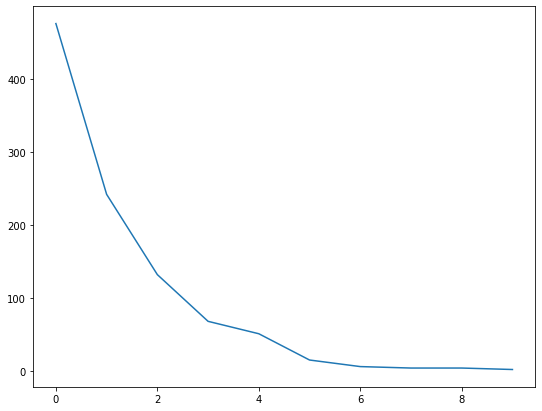

In [76]:
# Получим интервалы ([log2(n)]+1 интервала)
int_cnt = math.ceil(np.log2(len(exponential)))
x = np.linspace(0, np.max(exponential), num=int_cnt+1)
# Определим, сколько значений находится в каждом из интервалов
n = np.zeros((int_cnt,))
for X in exponential:
    i = 0
    while not (x[i] < X <= x[i+1]):
        i+=1
    n[i]+=1
# Вычислим теоретические частоты
print("попадания",n)
p = np.empty_like(n)
for i in range(len(x)-1):
    p[i] = math.exp(-my_lambda * x[i]) - math.exp(-my_lambda * x[i+1])
n_t = np.multiply(p, my_size)
# Ковариация
cov = [(n[i] - n_t[i]) ** 2 / n_t[i] for i in range(int_cnt)]
# Полученное значение \chi^2
pearson = sum(cov)

# Критерий Пирсона при 5% и v=10
hi_criteria = 16.92
if pearson <= hi_criteria: 
  print( "гипотеза ОК",pearson)
else:
  print( "гипотезу следует отбросить",pearson)

rn =[ i for i in range(len(n))]
plt.figure(figsize=(9,7 ))
plt.plot(rn, n)
plt.show()

гипотеза  Верна

### Дискретная случайная величина


Согласно варианту, $i = 10 , j = 1, k = 6, t = 2(i+j+k) = 34$

|$x_i$| 0 | 1 | 2 | 3 |
|-----|---|---|---|---|
|$p_i$|$\frac{i}{t}$|$\frac{j}{t}$|$\frac{ i+j }{t}$|$\frac{2k}{t}$|


|$x_i$| 0 | 1 | 2 | 3 |
|-----|---|---|---|---|
|$p_i$|$\frac{10}{34}$|$\frac{1}{34}$|$\frac{11}{34}$|$\frac{12}{34}$|

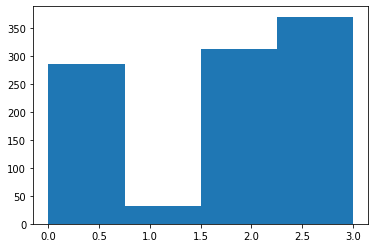

In [77]:
# Определим, сколько значений находится в каждом из интервалов
cnt = np.zeros((int_cnt,))
dx = [0, 10/34, 11/34, 22/34, 34/34]
for X in linear:
    i = 0
    while not (dx[i] < X <= dx[i+1]):
        i+=1
    cnt[i]+=1
# Определим частоты
p_discr = np.divide(cnt, my_size)
p_d_teor = [10/34, 1/34, 11/34, 12/34]
# Сформируем последовательность и построем по ней гистограмму
discr_exponential = []
for i in range(len(cnt)):
    for k in range(int(cnt[i])):
        discr_exponential.append(i)
plt.hist(discr_exponential, 4)
plt.show()

In [82]:
discr_mean = np.mean(discr_exponential)
discr_mean2 = np.mean(np.square(discr_exponential))
discr_dispertion = discr_mean2 - discr_mean**2
print("Среднее {}, дисперсия {}".format(discr_mean, discr_dispertion))

Среднее 1.766, дисперсия 1.4912440000000005


In [86]:
d_n_t = [p * my_size for p in p_d_teor]
# Ковариация
discr_cov = [(cnt[i] - d_n_t[i]) ** 2 / d_n_t[i] for i in range(4)]

hi_criteria =7.8
# Полученное значение \chi^2
d_pearson = sum(discr_cov)
print("Вычисленное \chi ^2 {}, критерий Пирсона {}, {}".format(d_pearson, hi_criteria, "гипотеза подтверждена" if d_pearson <= hi_criteria else "гипотезу следует отбросить"))

Вычисленное \chi ^2 1.6871878787878818, критерий Пирсона 7.8, гипотеза подтверждена
